In [1]:
import pandas as pd
from divergent_files import scan_for_divergence, exec_metadata_path
from json import loads
from copy import deepcopy

Text(0, 0.5, 'p values')

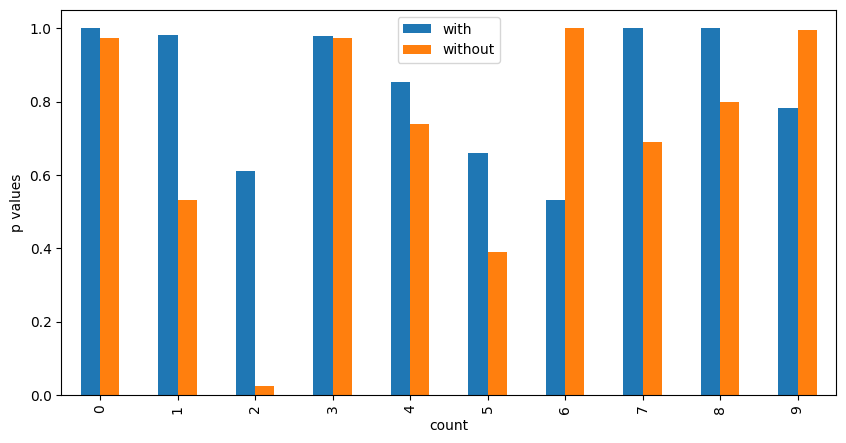

In [2]:
def to_pd_frame(optimization_name):
    files = scan_for_divergence()['subset']
    res = {}
    count = 0
    for f in files:
        fullpath = exec_metadata_path + f
        res[f] = {"with": [], "without": []}
        content = loads(open(fullpath).read())
        subset_metadata = content['subset_metadata']
        for key, val in subset_metadata.items():
            if optimization_name in val['subset'] and len(val['subset']) > 2 :
                res[f]['with'].append(val['divergence_from_qiskit']['p-value'])

                subset_copy = deepcopy(val['subset'])
                subset_copy.remove(optimization_name)
                
                for key2, val2 in subset_metadata.items():
                    if subset_copy == val2['subset']:
                        res[f]['without'].append(val2['divergence_from_qiskit']['p-value'])
                count += 1
    
    return res

opt_name = 'eject_z'
data = to_pd_frame(opt_name)
one = data['ac576f9b983141608ad047b2bb4beb42.json']
one['with'] = one['with'][0:10]
one['without'] = one['without'][0:10]
df = pd.DataFrame(one)
plt = df.plot(kind='bar', figsize=(10,5))
plt.set_xlabel('count')
plt.set_ylabel('p values')

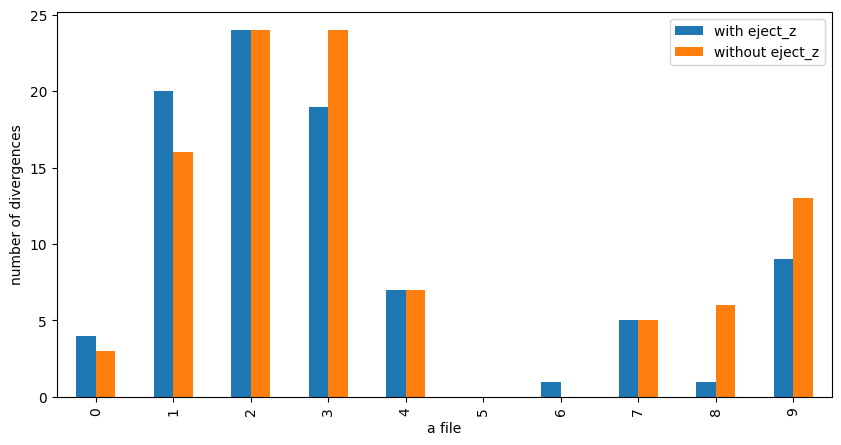

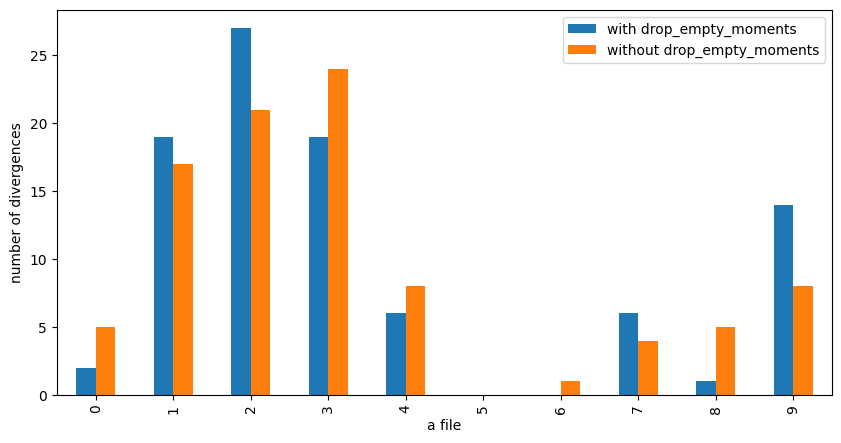

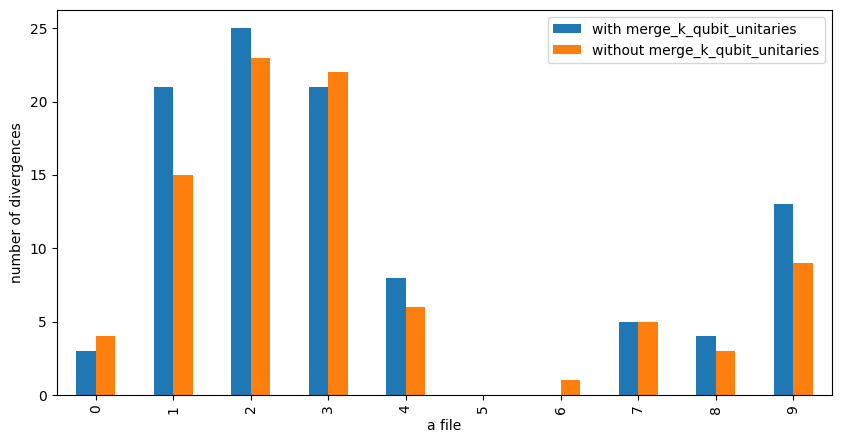

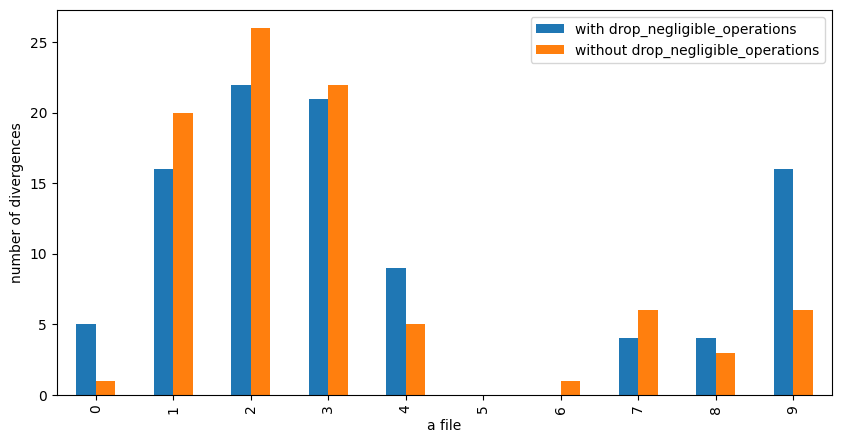

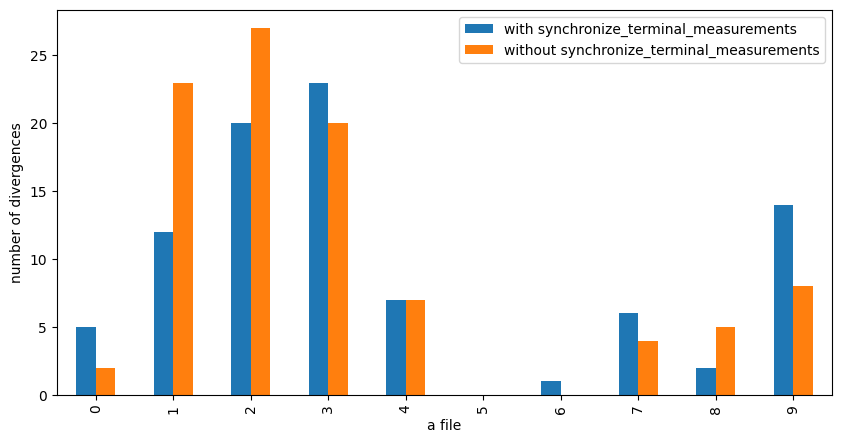

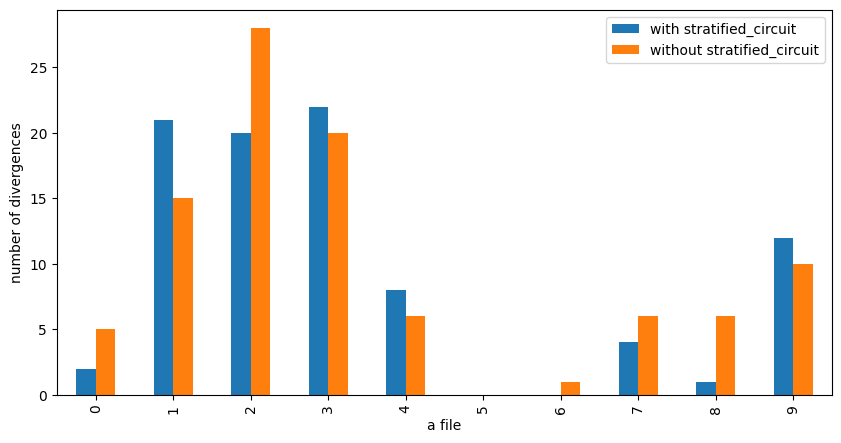

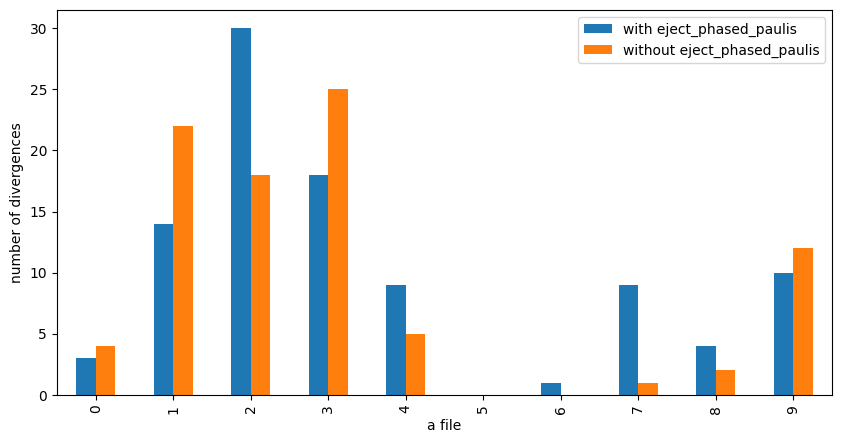

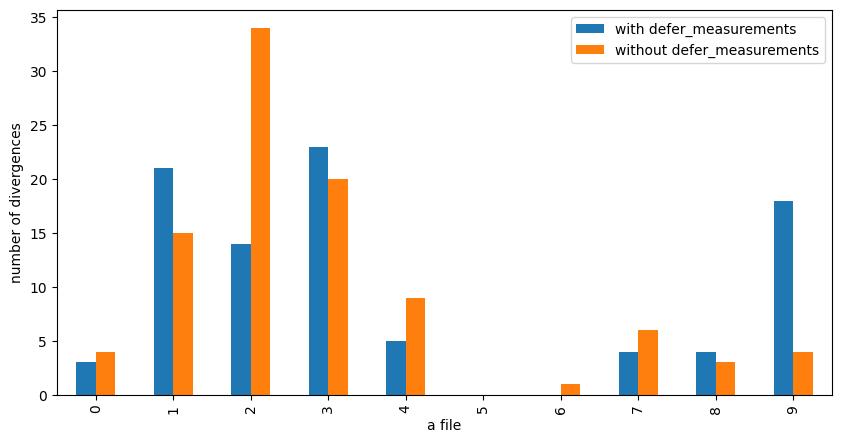

In [14]:
opts = [
                "eject_z",
                "drop_empty_moments",
                "merge_k_qubit_unitaries",
                "drop_negligible_operations",
                "synchronize_terminal_measurements",
                "stratified_circuit",
                "eject_phased_paulis",
                "defer_measurements"]

def all_opts():
    dfs = []
    total = []
    for opt in opts:
        for k, v in to_pd_frame(opt).items():
            l = [ len(list(filter(lambda x: x <= 0.05, v['with']))), 
                 len(list(filter(lambda x: x <= 0.05, v['without']))) ]
            total.append( l )
        
        df = pd.DataFrame(total, columns=[f'with {opt}', f'without {opt}'])
        plt = df.plot(kind='bar', figsize=(10,5))
        plt.set_xlabel('a file')
        plt.set_ylabel('number of divergences')
        dfs.append(plt)
        total = []
    return dfs

dfs = all_opts()